In [9]:
from pycaret.datasets import get_data
from pycaret.anomaly import *
import pandas as pd
import numpy as np
anomaly = get_data('anomaly')
exp_name = setup(data = anomaly)

,Col1,Col2,Col3,Col4,Col5,Col6,Col7,Col8,Col9,Col10
0,0.263995,0.764929,0.138424,0.935242,0.605867,0.518790,0.912225,0.608234,0.723782,0.733591
1,0.546092,0.653975,0.065575,0.227772,0.845269,0.837066,0.272379,0.331679,0.429297,0.367422
2,0.336714,0.538842,0.192801,0.553563,0.074515,0.332993,0.365792,0.861309,0.899017,0.088600
3,0.092108,0.995017,0.014465,0.176371,0.241530,0.514724,0.562208,0.158963,0.073715,0.208463
4,0.325261,0.805968,0.957033,0.331665,0.307923,0.355315,0.501899,0.558449,0.885169,0.182754


,Description,Value
0,Session id,7001
1,Original data shape,"(1000, 10)"
2,Transformed data shape,"(1000, 10)"
3,Numeric features,10
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,CPU Jobs,-1
9,Use GPU,False


In [10]:
data = pd.read_csv("creditcard.csv")

In [11]:
data.shape

(284807, 31)

In [12]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [13]:
explain = setup(data)

,Description,Value
0,Session id,6001
1,Original data shape,"(284807, 31)"
2,Transformed data shape,"(284807, 31)"
3,Numeric features,31
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,CPU Jobs,-1
9,Use GPU,False


In [19]:
data['Class'].sum()

492

In [14]:
from pycaret.classification import *
clf1 = setup(data = data, target = 'Class')

# compare models
best = compare_models()

,Description,Value
0,Session id,4911
1,Target,Class
2,Target type,Binary
3,Original data shape,"(284807, 31)"
4,Transformed data shape,"(284807, 31)"
5,Transformed train set shape,"(199364, 31)"
6,Transformed test set shape,"(85443, 31)"
7,Numeric features,30
8,Preprocess,True
9,Imputation type,simple


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.9996,0.9533,0.7818,0.9518,0.8574,0.8572,0.8619,4.8280
xgboost,Extreme Gradient Boosting,0.9996,0.9815,0.8020,0.9501,0.8685,0.8683,0.8721,30.8970
rf,Random Forest Classifier,0.9995,0.9520,0.7758,0.9379,0.8479,0.8477,0.8522,46.9690
lda,Linear Discriminant Analysis,0.9994,0.9009,0.7702,0.8492,0.8065,0.8062,0.8078,1.0740
dt,Decision Tree Classifier,0.9993,0.9024,0.8051,0.8036,0.8030,0.8027,0.8034,4.5790
ada,Ada Boost Classifier,0.9993,0.9774,0.7322,0.8362,0.7798,0.7794,0.7816,16.7460
gbc,Gradient Boosting Classifier,0.9992,0.7381,0.6046,0.8993,0.7193,0.7189,0.7349,86.3570
lr,Logistic Regression,0.9991,0.9482,0.5986,0.8440,0.6980,0.6976,0.7091,4.0910
ridge,Ridge Classifier,0.9988,0.0000,0.4128,0.8256,0.5468,0.5462,0.5811,0.1480
knn,K Neighbors Classifier,0.9983,0.5930,0.0206,0.4667,0.0391,0.0390,0.0954,18.0410


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9995,0.9691,0.7714,0.9643,0.8571,0.8569,0.8623
1,0.9996,0.9983,0.8571,0.9375,0.8955,0.8953,0.8962
2,0.9996,0.9988,0.8857,0.9118,0.8986,0.8984,0.8985
3,0.9996,0.9582,0.8000,0.9655,0.8750,0.8748,0.8787
4,0.9995,0.9691,0.7647,0.9630,0.8525,0.8522,0.8579
5,0.9996,0.9877,0.7941,0.9643,0.8710,0.8708,0.8749
6,0.9996,0.9820,0.8529,0.9062,0.8788,0.8786,0.8790
7,0.9995,0.9891,0.7647,0.9630,0.8525,0.8522,0.8579
8,0.9996,0.9807,0.7941,0.9643,0.8710,0.8708,0.8749


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

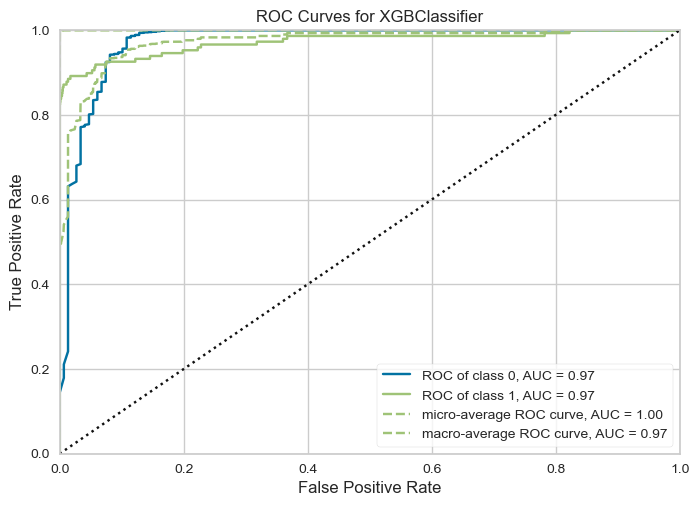

In [15]:
XGBmodel = create_model('xgboost')
plot_model(XGBmodel)

In [16]:
xgb_predictions = predict_model(XGBmodel, data = data)
xgb_predictions

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extreme Gradient Boosting,0.9999,0.9917,0.9289,0.9870,0.9571,0.9570,0.9574


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V23,V24,V25,V26,V27,V28,Amount,Class,prediction_label,prediction_score
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.619995,0,0,1.0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.690000,0,0,1.0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.660004,0,0,1.0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.500000,0,0,1.0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.989998,0,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834784,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.770000,0,0,1.0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.790001,0,0,1.0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.879997,0,0,1.0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.000000,0,0,1.0


In [17]:
evaluate_model(XGBmodel)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [24]:
tuned_model = tune_model(XGBmodel)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9995,0.9684,0.7714,0.9643,0.8571,0.8569,0.8623
1,0.9997,0.9979,0.8857,0.9394,0.9118,0.9116,0.9120
2,0.9996,0.9990,0.8857,0.9118,0.8986,0.8984,0.8985
3,0.9996,0.9733,0.8286,0.9667,0.8923,0.8921,0.8948
4,0.9996,0.9745,0.7941,1.0000,0.8852,0.8851,0.8910
5,0.9996,0.9949,0.7941,0.9643,0.8710,0.8708,0.8749
6,0.9996,0.9893,0.8824,0.9091,0.8955,0.8953,0.8954
7,0.9995,0.9916,0.7647,0.9630,0.8525,0.8522,0.8579
8,0.9995,0.9761,0.7941,0.9000,0.8438,0.8435,0.8452


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [26]:
plot_model(XGBmodel, plot = 'confusion_matrix', save = True)

'Confusion Matrix.png'

In [27]:
bagged_model = ensemble_model(XGBmodel)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9995,0.9680,0.7429,0.9630,0.8387,0.8385,0.8456
1,0.9997,0.9981,0.8571,0.9677,0.9091,0.9089,0.9106
2,0.9996,0.9992,0.8571,0.9375,0.8955,0.8953,0.8962
3,0.9996,0.9645,0.8000,0.9655,0.8750,0.8748,0.8787
4,0.9995,0.9761,0.7647,0.9286,0.8387,0.8385,0.8424
5,0.9995,0.9971,0.7647,0.9630,0.8525,0.8522,0.8579
6,0.9996,0.9932,0.8824,0.9091,0.8955,0.8953,0.8954
7,0.9995,0.9940,0.7647,0.9630,0.8525,0.8522,0.8579
8,0.9994,0.9827,0.7353,0.9259,0.8197,0.8194,0.8249


Processing:   0%|          | 0/6 [00:00<?, ?it/s]